# Computing distances using Gaia parallaxes for I2017 target list

This notebook uses the following references:<br>
Luri et. al. 2018 (https://arxiv.org/abs/1804.09376)<br>
Bailer-Jones 2015 (https://arxiv.org/pdf/1507.02105.pdf)<br>
Astraatmadja & Bailer-Jones 2016 ('Paper 2' http://iopscience.iop.org/article/10.3847/0004-637X/832/2/137/pdf)<br>
Astraatmadja & Bailer-Jones 2016 ('Paper 3' http://www.mpia.de/~calj/tgas_distances/parallax3.pdf)<br>

In [1]:
import pandas as pd
from astropy.io import fits
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u
# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')
from astroquery.gaia import Gaia
from matplotlib import pyplot as plt

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


### Import the array of I2017 targets with Gaia source ids:

In [2]:
k = pd.read_csv('I2017_gaia_xmatch_trimmed.csv')
print k.shape
gaia_id,hip_id = k['source_id'].values,k['star'].values
hra,hdec,gra,gdec = k['raj20155'].values,k['dec20155'].values,k['ra'].values,k['dec'].values
hpmra,hpmde,gpmra,gpmde = k['pmra.1'].values,k['pmde'].values,k['pmra'].values,k['pmdec'].values
ggmag,hvmag = k['phot_g_mean_mag'].values,k['vmag'].values
hdist,gparallax,gparaerror = k['dist'].values,k['parallax'].values,k['parallax_error'].values
l,b,ecl_lon,ecl_lat,radius,rv = k['l'].values,k['b'].values,k['ecl_lon'].values,k['ecl_lat'].values,\
    k['radius_val'].values,k['radial_velocity'].values
teff,lum,color = k['teff_val'].values,k['lum_val'].values,k['astrometric_pseudo_colour'].values
k=k.drop(['table6_oid', 'col1'], axis=1)

(1669, 111)


In [3]:
# Something happened with the spectral type string.  Quick fix:
sptype = k["sptype"].values
for i in range(len(sptype)):
    sptype[i] = sptype[i].strip('"')
print sptype[0].count('"')
print sptype[0]
#print sptype[0].strip('"')
k['sptype'] = sptype
k

0
K3V    


,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,raj20155,dec20155,ep,vmag,sptype,dist,pmra.1,pmde,simbadname,angdist
0,0,1635721458409799680,Gaia DR2 2341871673090078592,2341871673090078592,1481689922,2015.5,0.005093,0.267211,-19.498840,0.178723,...,0.004942,-19.498611,2015.5,9.27,K3V,45.60,0.18,0.00,HIP2,0.000270
1,1,1635721458409799680,Gaia DR2 4706564427272810624,4706564427272810624,592068553,2015.5,0.538886,0.454880,-68.281740,0.452342,...,0.537154,-68.281546,2015.5,9.24,M0V,15.80,0.21,-0.23,HIP169,0.000669
2,2,1635721458409799680,Gaia DR2 2853900872207150720,2853900872207150720,324321780,2015.5,0.546585,0.770322,27.077779,0.709696,...,0.545858,27.078261,2015.5,5.80,G3V,12.40,0.78,-0.92,HIP171,0.000807
3,3,1635721458409799680,Gaia DR2 2746883550048724992,2746883550048724992,873465422,2015.5,0.623350,0.343970,8.485262,0.149161,...,0.623363,8.485062,2015.5,5.70,F0V,37.60,-0.09,-0.05,HIP194,0.000199
4,4,1635721458409799680,Gaia DR2 2848150288954631296,2848150288954631296,716361197,2015.5,1.236466,0.047620,23.269597,0.042992,...,1.236219,23.269401,2015.5,7.82,G9V,25.60,0.38,-0.01,HIP400,0.000300
5,5,1635721458409799680,Gaia DR2 386655019234959872,386655019234959872,665449823,2015.5,1.300748,0.037335,45.785915,0.023836,...,1.299162,45.785743,2015.5,9.95,M2,11.40,0.87,-0.15,HIP428,0.001119
6,6,1635721458409799680,Gaia DR2 4706630501049679744,4706630501049679744,1534910858,2015.5,1.322372,0.028273,-67.835003,0.023457,...,1.323233,-67.834911,2015.5,8.49,K5V,16.00,-0.12,-0.56,HIP436,0.000338
7,7,1635721458409799680,Gaia DR2 2444348733778920832,2444348733778920832,664581359,2015.5,1.333869,0.440821,-5.707235,0.226905,...,1.333707,-5.707113,2015.5,4.61,K1III,39.40,-0.01,0.09,HIP443,0.000203
8,8,1635721458409799680,Gaia DR2 423075173680043904,423075173680043904,1632509498,2015.5,1.567845,0.034364,58.436857,0.030864,...,1.566910,58.436753,2015.5,5.98,G5V,20.20,0.25,0.02,HIP518,0.000501
9,9,1635721458409799680,Gaia DR2 4976894960284258048,4976894960284258048,1148153609,2015.5,1.583677,0.038353,-49.075362,0.040296,...,1.582497,-49.075172,2015.5,5.70,G1IV...,25.60,0.58,-0.04,HIP522,0.000796


Some source don't have Gaia parallaxes:

In [4]:
print gparallax[np.where(np.isnan(gparallax))[0]].shape
#print np.where(np.isnan(frac_para_error))
print ''
print 'These do no thave Gaia parallaxes:'
print hip_id[np.where(np.isnan(gparallax))[0]]


(45,)

These do no thave Gaia parallaxes:
['HIP443' 'HIP1242' 'HIP2081' 'HIP2762' 'HIP8903' 'HIP11452' 'HIP12351'
 'HIP14576' 'HIP16134' 'HIP16852' 'HIP23875' 'HIP35296' 'GJ273' 'HIP36349'
 'HIP42913' 'HIP46706' 'HIP48659' 'HIP49973' 'HIP51986' 'HIP52190'
 'HIP54182' 'HIP54872' 'HIP65378' 'HIP67301' 'GJ559B' 'GJ559A' 'HIP72622'
 'HIP77516' 'HIP81919' 'HIP82817' 'HIP84123' 'HIP88601' 'GJ702A' 'GJ702B'
 'HIP95501' 'HIP98204' 'HIP101955' 'HIP108752' 'HIP109268' 'HIP109821'
 'HIP113963' 'HIP89937' 'GJ412A' 'HIP59750' 'GJ866']


Bailer-Jones and Astraatmadja demonstrated that sources with high fractional parallax error ( f = $\omega/\sigma_{\omega}$ ) are more susceptible to the specific choise of prior, because as noise goes up, the posterior approaches the shape of the prior.

Find the typical fractional parallax error in our target list:

0.0855993462087


<IPython.core.display.Javascript object>


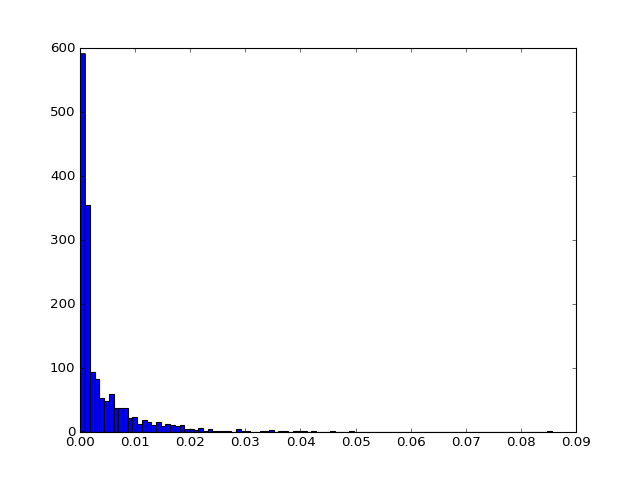

In [5]:
frac_para_error = gparaerror/gparallax

print np.max(frac_para_error[~np.isnan(frac_para_error)])
%matplotlib notebook
plt.hist(frac_para_error[~np.isnan(frac_para_error)],bins=100)
plt.show()

So for every object in this sample with a parallax, that parallax is positive and with a small fractional parallax error.  This is good - Bailer-Jones 2015 found that fraction > 20% are much more sensitive to prior selection.  For low f you get an estimator muhc closer to 1/r.  But Bailer-Jones 2015 also found that only 20% of Gaia stars have f<0.2, so its weird that all of our sources are...?  But that is refering to DR1, I don't know about DR2 values of f.

In [137]:
print np.where(gparallax<0)

(array([], dtype=int64),)


So none of our objects have negative parallaxes, which is good.

### Determining posterior distribution for distance in our sample:

Bailer-Jones 2015 and Luri et. al 2018 make the case that the best way to approach deriving a distance estimate from parallaxes is the treat it as an inference problem - that is, using a Bayesian approach.<br>
Bayes' formula applied here is given by:
\begin{equation*}
P(r \mid \varpi , \sigma_{\varpi}) = \frac{1}{Z} P(\varpi \mid r , \sigma_{\varpi})P(r)
\end{equation*}

Where $P(\varpi \mid r , \sigma_{\varpi})$ is the likelihood of the parallax measurement for a given distance r and is described by a Gaussian distribution about r with variance $\sigma_{\varpi}^{2}$, and $P(r)$ is the prior distribution of the probability for each distance r, and Z is a normalization constant.

Bailer-Jones and Astraatmadja test three choices for a prior on r: 1 - a uniform distribution, 2 - a uniform space density of stars, and 3 - an exponentially decreasing space density of stars with a scale length L.  They determined that the exponentially decreasing distribution is the only one that does an adequate job of describing obeservations, so I will not even address the others here.

Exponentially decreasing space density PDF:
\begin{equation*}
P(r)   = \frac{1}{L^{3}} r^{2} e^{-\frac{r}{L}} \; for \; r>0
\end{equation*}

This prior gives the posterior distribution:
\begin{equation*}
P(r)   = \frac{r^{2} \, e^{-\frac{r}{L}}}{\sigma_{\varpi}} \, exp \big[-\frac{1}{2\sigma^{2}_{\varpi}} \, \big(\varpi - \frac{1}{r} \big)^{2}\big] \; for \; r > 0
\end{equation*}

They determine in Paper 2 that the scale length that best matches observations is L = 1.35 kpc

They test several statistics on this posterior as distance estimators, and found the mode of the distribution is the best distance estimator.  <br>
The mode can be easily found by maximizing the function, which results in finding the root of the equation: <br>
\begin{equation*}
\frac{r^{3}}{L} - 2r^{2} + \frac{\varpi}{\sigma^{2}_{\varpi}} r - \frac{1}{\sigma^{2}_{\varpi}} = 0
\end{equation*}

Which can be easily done for each source in the list using numpy root finding.<br>
What isn't as easy is the uncertainty for this statistic.  Bailer-Jones recommends using 95% credible intervals rather than standard deviations, since a standard deviation has the potential to allow negative distances, which isn't physical. <br>

Let's address the distance estimate first.

### Proof of concept:

The following uses the first object in the target list to illustrate how the distance estimate is acheived, and how the posterior changes with the fractional parallax error.

*** Note - Gaia archive gives parallax and parallax error in mas, the distance estimate requires parallax in arcsec.

In [6]:
# Root finding numpy:
# Demonstrate concept using the first object on the target list:
L = 1350 #pc
coeff = np.array([(1/L),(-2),((gparallax[0]/1000)/((gparaerror[0]/1000)**2)),-(1/((gparaerror[0]/1000)**2))])
print 'Roots of the estimate eqn:',np.roots(coeff)
print 'Naive estimator r = 1/parallax:',1/(gparallax[0]/1000)
print 'Distance from I2017:,',hdist[0]

Roots of the estimate eqn: [  1.23176276e+05   3.98205707e+01]
Naive estimator r = 1/parallax: 39.8077016091
Distance from I2017:, 45.6


So this equation has two roots, one of which matches the Hipparcos catalog value much more correctly, and is very close to the naive estimator r = 1/parallax.

We will need to code in a way to decide the closest estimation in the case of mutiple roots.

But first, to demonstrate that we are appoximating Bailer-Jones' work correctly, the following cell shows how the posterior distribution changes with the fractional parallax error, similar to plots in Paper 2.

*** Note - P -asterix indicates unnormalized PDF; each curve is scaled to the max value = 1

<IPython.core.display.Javascript object>


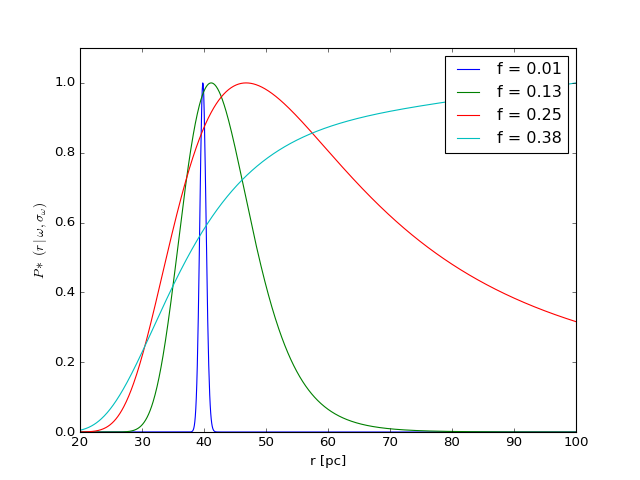

In [7]:
# Proof of concept: posterior distribution
omega,sigma = gparallax[0]/1000,gparaerror[0]/1000
#omega,sigma = -0.002,gparaerror[0]/1000
r = np.linspace(20,100,1e3-1)
post = (r**2*np.exp(-r/L)/sigma)*np.exp((-1/(2*(sigma)**2))*(omega-(1/r))**2)
post2 = (r**2*np.exp(-r/L)/(sigma*10))*np.exp((-1/(2*(sigma*10)**2))*(omega-(1/r))**2)
post3 = (r**2*np.exp(-r/L)/(sigma*20))*np.exp((-1/(2*(sigma*20)**2))*(omega-(1/r))**2)
post4 = (r**2*np.exp(-r/L)/(sigma*30))*np.exp((-1/(2*(sigma*30)**2))*(omega-(1/r))**2)

%matplotlib notebook
plt.plot(r,post/np.max(post),label='f = {0}'.format(np.round(sigma/omega,decimals=2)))
plt.plot(r,post2/np.max(post2),label='f = {0}'.format(np.round(sigma*10/omega,decimals=2)))
plt.plot(r,post3/np.max(post3),label='f = {0}'.format(np.round(sigma*20/omega,decimals=2)))
plt.plot(r,post4/np.max(post4),label='f = {0}'.format(np.round(sigma*30/omega,decimals=2)))
plt.ylim(0,1.1)
plt.legend()
plt.ylabel('$P*\;(r \mid \omega , \sigma_{\omega})$')
plt.xlabel('r [pc]')
plt.show()


We see that the observed fractional parallax error result is tightly constrained near 40 pc, and that larger values of f do indeed have a large effect on the posterior.  <br>
Fortunately all our f values here are below 0.1, which is a nice place to be.

### Compute distance for I2017 objects:

It appears that all of our objects have two roots to the above equation, one of order 10^1 and one of order 10^5-10^7.  Clearly the smaller of the two is the one we want.

All of the followng equations and methods are adapted from the Gaia R tutorial https://repos.cosmos.esa.int/socci/projects/GAIA/repos/astrometry-inference-tutorials/browse/single-source/tutorial/Rcode/distance_functions.R?at=2c11dda5bf13cf0a52ce4f9c2eb586c83abf9cb8

In [8]:
hip_id2 = hip_id[~np.isnan(gparallax)]

In [9]:
# convert to arcsec and remove objects without parallaxes:
omega,sigma = gparallax[~np.isnan(gparallax)]/1000,gparaerror[~np.isnan(gparallax)]/1000
# The corresponding distance for the same objest in I2017:
href = hdist[~np.isnan(gparallax)]
# Set length scale:
L = 1350 #pc

# Testing on the first object in I2017:
coeff = np.array([(1./L),(-2),((omega[0])/(sigma[0]**2)),-(1/((sigma[0])**2))])
gdist = np.roots(coeff)
print 'Roots of the estimate eqn:',gdist
# Find the root that is closest to the I2017 value:
idx = np.abs(gdist - hdist[0]).argmin()
gdist_final = gdist[idx]
print 'Final distance result:',gdist_final

# Repeat for all objects in the target list:
gdist = np.array([])
for i in range(len(omega)):
    coeff = np.array([(1./L),(-2),((omega[i])/((sigma[i])**2)),-(1./((sigma[i])**2))])
    g = np.roots(coeff)
    # Find the number of real roots:
    reals = np.isreal(g)
    realsum = np.sum(reals)
    # If there is one real root, that root is the  mode:
    if realsum == 1:
        gd = np.real(g[np.where(reals)[0]])
    # If all roots are real:
    elif realsum == 3:
        if omega[i] >= 0:
            # Take the smallest root:
            gd = np.min(g)
        elif omega[i] < 0:
            # Take the positive root (there should be only one):
            gd = g[np.where(g>0)[0]]
    gdist = np.append(gdist,gd)
print gdist

Roots of the estimate eqn: [ 1330.08980961+18188.13878593j  1330.08980961-18188.13878593j
    39.82038077    +0.j        ]
Final distance result: (39.8203807716+0j)
[ 39.82038077  15.19736463  12.64835672 ...,   3.28710558  19.18237185
   3.15501458]


In [140]:
# Checking that the results look reasonable:
#for i in range(len(omega)):
#    print hip_id[~np.isnan(gparallax)][i],gdist[i],href[i]

HIP 1692 is very different from the I2017 value.  But looking into the other parameters, they seem to match well.  I also looked at the Simbad entry for this star and found a parallax of 1.48 listed for it from Gaia DR1, which corresponds to 770 pc.  So I conclude the distance in I2017 is incorrect.
Same for HIP30756.  The Gaia DR2 result is unambiguous, I couldn't find an entry in Simbad for this object (It sent me to HIP257498, which doesn't have the same properties as this object).

In [10]:
print np.where(hip_id == 'HIP1692')
print gdist[24],href[24],hip_id2[24]
#print k.loc[26]
print gdist[419],href[419],hip_id2[419]
print np.where(hip_id == 'HIP30756')
#print k.loc[430]

(array([26]),)
770.935880536 23.0 HIP1692
330.957250947 18.0 HIP30756
(array([430]),)


24.2884105506


<IPython.core.display.Javascript object>


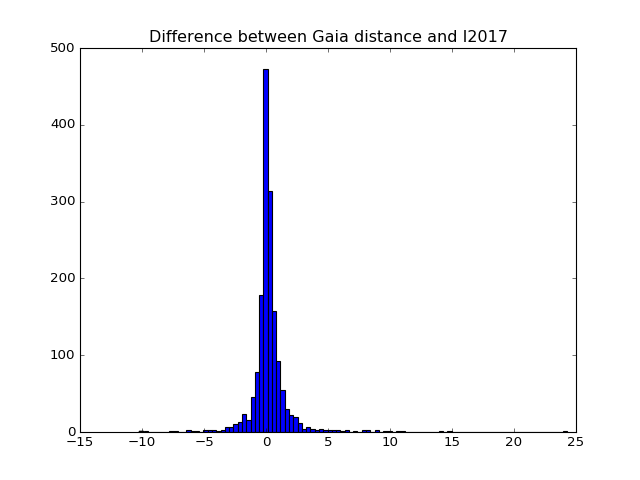

In [11]:
diff = gdist-href
diff2 = np.delete(diff,[24,419])
print np.max(diff2)
%matplotlib notebook
plt.hist(diff2,bins=100)
plt.title('Difference between Gaia distance and I2017')
plt.show()

<IPython.core.display.Javascript object>


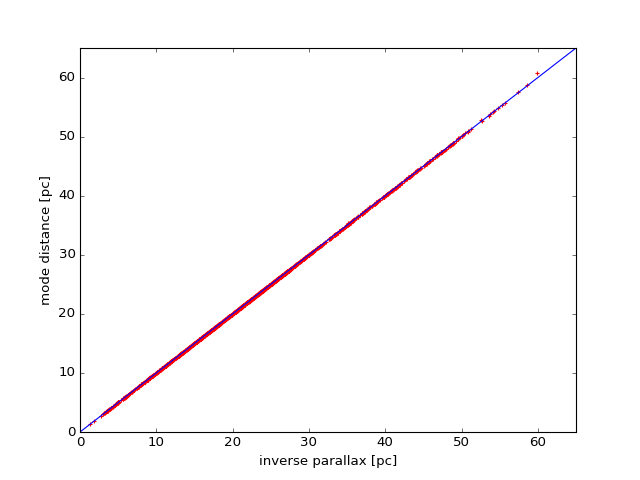

In [17]:
naive_dist = 1/omega
x = np.linspace(0,1000,1000)
y=x
%matplotlib notebook
plt.scatter(naive_dist,gdist,marker='+',color='red')
plt.plot(x,y)
plt.xlim(0,65)
plt.ylim(0,65)
plt.xlabel('inverse parallax [pc]')
plt.ylabel('mode distance [pc]')
plt.show()

<IPython.core.display.Javascript object>


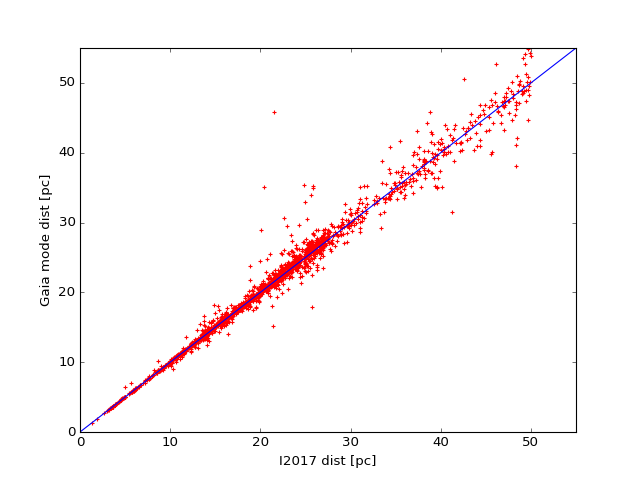

In [18]:
x=np.linspace(0,60,60)
y=x
%matplotlib notebook
plt.scatter(href,gdist,marker='+',color='red')
plt.plot(x,y)
plt.xlim(0,55)
plt.ylim(0,55)
plt.xlabel('I2017 dist [pc]')
plt.ylabel('Gaia mode dist [pc]')
plt.show()

In [12]:
print href.shape,gdist.shape,hip_id2.shape
gaia_id2 = gaia_id[~np.isnan(gparallax)]
print gaia_id2.shape
d = {'i': href, 'j': gdist, 'k': hip_id2}
df = pd.DataFrame(data=d)


(1624,) (1624,) (1624,)
(1624,)


I seem to be uable to assign labels to show up on the bokeh plot.  Despite doing everything exactly as all the documentation says.  By every reference I can find this should be working but it is not.

In [23]:
from bokeh.plotting import figure as bfig

output_file("toolbar.html")

source = ColumnDataSource(data=dict(
    x=[1, 2, 3, 4, 5],
    y=[2, 5, 8, 2, 7],
    desc=['A', 'b', 'C', 'd', 'E'],
))

TOOLTIPS = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("desc", "@desc"),
]

p = bfig(plot_width=400, plot_height=400, tools=[hover],
           title="Mouse over the dots")

p.circle('x', 'y', size=20, source=source)

show(p)

In [34]:
# I wanted to get the functionality of hovering over the point ot see the id:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
import bokeh
import bokeh.charts
from bokeh.io import output_notebook,push_notebook
from bokeh.models import HoverTool

d = {'i': href, 'j': gdist, 'k': hip_id2}
df = pd.DataFrame(data=d)

source = ColumnDataSource.from_df(df)

hover = HoverTool(tooltips=[
    ("I 2017", "@i"),
    ("Gaia", "@j"),
    ("ID", "@k")])

TOOLTIPS=[
    ("I 2017", "@x"),
    ("Gaia", "@j"),
    ("ID", "@k")]

output_notebook()
output_file("plot.html")
p=figure(title='I2017 vs Gaia distance estimate',x_axis_label='I2017 dist [pc]',\
        y_axis_label='Gaia mode dist[pc]',tools=[hover])

p.inverted_triangle(href,gdist,fill_alpha=0.5,line_color='blue',line_alpha=0.5,size=6)
#p.add_tools(hover)
p.line(x,y,line_color='blue',line_dash='4 4')
show(p)

ImportError: No module named charts

### Ok time to deal with FWHM and 95% credible intervals

In [147]:
# FWHM:
rmode = gdist[0]
rmax = 1e6

M = (rmode**2*np.exp(-rmode/L)/sigma[0])*np.exp((-1./(2*(sigma[0])**2))*(omega[0]-(1./rmode))**2)
#rootfunc = 2*np.log(x)-(x/L)-((1./(2*sigma[0]**2))*(omega[0]-(1./x))**2) - np.log(sigma[0]*M/2.) - 0.5*np.log(2*np.pi)
print M,gdist[0],L,omega[0],sigma[0]

4820550.1061 39.8203807716 1350 0.0251207670772 0.000319277068537


In [148]:
from scipy.optimize import brentq
from scipy.optimize import root,fsolve
#from scipy.optimize import newton as root

lo = brentq(lambda x: 2*np.log(x)-(x/L)-(((omega[0]-(1./x))**2)/(2*sigma[0]**2)) \
               +np.log(2)-np.log(M)-np.log(sigma[0]), 0.001, rmode)
hi = brentq(lambda x: 2*np.log(x)-(x/L)-(((omega[0]-(1./x))**2)/(2*sigma[0]**2)) \
               +np.log(2)-np.log(M)-np.log(sigma[0]), rmode, rmax)

#pcrit = fsolve(lambda x: 2*np.log(x)-(x/L)-((1./(2*sigma[0]**2))*(omega[0]-(1./x))**2) - np.log(sigma[0]*M/2.) - \
#             0.5*np.log(2*np.pi), 39.2)

print lo,hi

39.2329998221 40.425619011


In [150]:
from scipy.optimize import brentq
rmax = 1e6
fwhm_lo,fwhm_hi = np.array([]),np.array([])
for i in range(len(omega)):
    rmode = gdist[i]
    M = (rmode**2*np.exp(-rmode/L)/sigma[i])*np.exp((-1./(2*(sigma[i])**2))*(omega[i]-(1./rmode))**2)
    lo = brentq(lambda x: 2*np.log(x)-(x/L)-(((omega[i]-(1./x))**2)/(2*sigma[i]**2)) \
               +np.log(2)-np.log(M)-np.log(sigma[i]), 0.001, rmode)
    hi = brentq(lambda x: 2*np.log(x)-(x/L)-(((omega[i]-(1./x))**2)/(2*sigma[i]**2)) \
               +np.log(2)-np.log(M)-np.log(sigma[i]), rmode, rmax)
    fwhm_lo,fwhm_hi = np.append(fwhm_lo,lo),np.append(fwhm_hi,hi)
    #print hip_id[i],gdist[i],lo,hi


   

### On to mcmc:

I could write my own but let me try DFM's emcee

In [151]:
# 95% interval with MHMCMC


In [152]:
# Setting up emcee following the example here: http://dfm.io/emcee/current/user/line/
import emcee
from scipy.stats.mstats import mquantiles
print gdist[0],omega[0],sigma[0]

39.8203807716 0.0251207670772 0.000319277068537


In [153]:
# I don't know why he used log base 10 in the tutorial rather than ln, but I will follow the tutorial and use it.
def lnlike(r):
    return (((omega[0]-(1./r))**2)/(2*sigma[0]**2) + 0.5*(-np.log(2*np.pi*sigma[0])))/np.log(10)
def lnprior(r):
    return (-(r/L) - np.log(2*L**3/r**2))/np.log(10)
def lnprob(r):
    lp = lnprior(r)
    if not np.isfinite(lp):
        return -np.inf #if lp isn't finite, set it to negative infinity
    return lp + lnlike(r)


print lnprob(gdist[0])
print lnprob(gdist[0]+0.01)
print lnprob(gdist[0]+0.1)
print lnprob(gdist[0]+1)
print lnprob(gdist[0]-0.01)
print lnprob(gdist[0]-0.1)
print lnprob(gdist[0]-1)

-5.15566819595
-5.15515377815
-5.14294829132
-4.30726141906
-5.15601333203
-5.15145961171
-4.30804980864


In [22]:
ndim,nwalkers = 1,1000
# Define an initial "ball" of starting positions around the distance estimate for the walkers:
pos = [gdist[0] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
# Define the sampler:
sampler = emcee.EnsembleSampler(nwalkers,ndim,lnprob)

In [23]:
samples = sampler.run_mcmc(pos,50)
#print samples[0]
#samples = sampler.chain[:, 50:, :].reshape((-1, ndim))

In [24]:
print samples[0].shape
print mquantiles(samples[0], prob=[0.05, 0.5, 0.95])

(1000, 1)
[ -45.03791155    3.96522666  705.1710064 ]


In [25]:
# The emcee walkers are wandering away after ~30 iterations.  
# I'm going to build my own MCMC.
from scipy.stats import norm

def lnlike(r):
    return (((omega[0]-(1./r))**2)/(2*sigma[0]**2) + 0.5*(-np.log(2*np.pi*sigma[0])))/np.log(10)
def lnprior(r):
    return (-(r/L) - np.log(2*L**3/r**2))/np.log(10)
def lnprob(r):
    lp = lnprior(r)
    if not np.isfinite(lp):
        return -np.inf #if lp isn't finite, set it to negative infinity
    return lp + lnlike(r)

mu_current = gdist[0]
sigma_current = (fwhm_hi[0]-fwhm_lo[0])/2.355 # <-approximate the distribution as gaussian
proposal_width = 0.5 #<- jump width
proposal = norm(mu_current,proposal_width).rvs()
print proposal
prob_of_proposal = lnprob(proposal)
prob_current = lnprob(gdist[0])
print lnprob(gdist[0]),prob_of_proposal

p_accept = prob_of_proposal/prob_current
dice = np.random.rand()
print p_accept,dice

accept = dice < p_accept
print accept


def sampler(lnprob,mu_init=0,proposal_width=0.5,nsamples=50,prob=[0.05, 0.5, 0.95]):
    from scipy.stats import norm
    mu_current = mu_init
    posterior = [mu_current]
    yes_accept = 0
    for i in range(nsamples):
        mu_proposal = norm(mu_current,proposal_width).rvs()
        prob_of_proposal = lnprob(mu_proposal)
        prob_current = lnprob(mu_current)
        p_accept = prob_of_proposal/prob_current
        dice = np.random.rand()
        accept = dice < p_accept
        if accept:
            mu_current = mu_proposal
            yes_accept = yes_accept+1 #for tracking acceptance rate
        posterior.append(mu_current)
    return posterior,mquantiles(posterior, prob=prob),np.float(yes_accept)/np.float(nsamples)
        
   

40.1046953652
-5.15566819595 -5.07599572261
0.984546625131 0.948107630908
True


In [26]:
import time

start = time.time()
post,quant,accept_rate = sampler(lnprob,mu_init=gdist[0],nsamples=10000,proposal_width=2.7)
end = time.time()
print(end - start)



10.9216351509


[ 38.14399739  39.90401545  41.72256175] 0.464


<IPython.core.display.Javascript object>


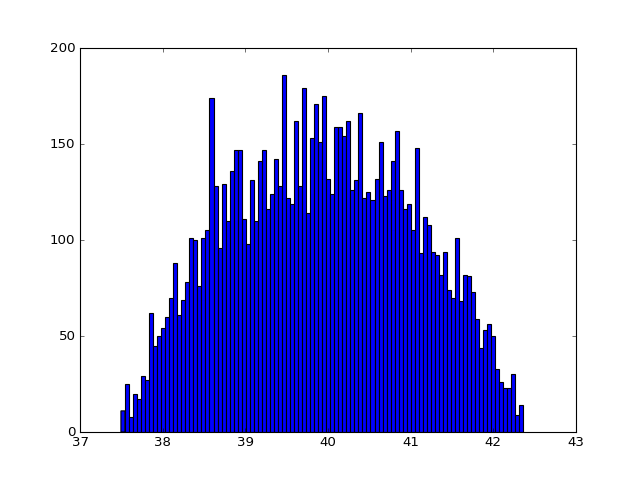

In [27]:
# [ 38.1496739   39.88620756  41.64055091] <-1e4 samples
print quant,accept_rate

%matplotlib notebook
plt.hist(post,bins=100)
plt.show()

### Approximate with Gaussian
1e5 samples takes 110s to compute - the entire 1700 sample list will take 45 hours.  1e4 samples takes 10s - 4.5hrs.
Better, but impractical for the million star sample. As can be seen in the plot as a function of fractional parallax error, a low fractional error (<~ 0.1) can be well approximated as a gaussian (above about 0.1 the skew starts to become apparent to the eye).<br>
If we approximate it is as a gaussian, we can use sigma = FWHM/2.355 to get the 95% quantile without further calculation. (Even though Bailer-Jones says not to do this because of the potential for negative distances)

In [158]:
# Demonstration with first object:
sig = (fwhm_hi-fwhm_lo)/2.355
quant = np.array([gdist[0]-2*sig[0],gdist[0]+2*sig[0]])
print '5%, 95%:',quant


5%, 95%: [ 38.8075407   40.83322085]


Hmm... the mcmc gave [ 38.07838909  41.73227663] <br>
That's not very close.  But the distribution of the posterior of the MCMC doesn't very much resemble the shape of the PDF from the blue curve in the PDF plot, so I'm not sure I trust the MCMC is doing the right thing.  I think the lnprob function is not correct (even though it is a careful reproduction of the tutorial's function, still something isn't right about it)<br>
DFM's MCMC gave [ 38.2363198   41.47364017] for low step counts (before wandering off), which is close to my mcmc.  Which make sense because both were drawing from the same log(Prob) for the posteriors.  Clearly that is where the problem lies and the next thing to try is to check those functions

In [627]:
# Trying to decrease comp time by usng multiple walkers.  This doesn't work yet, but 
'''def sampler(lnprob,mu_init=0,proposal_width=0.5,nsamples=50,nwalkers=12,ndim=1,prob=[0.05, 0.5, 0.95],burnin=0):
    from scipy.stats import norm
    mu_current = [mu_init + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
    posterior = np.array(mu_current)
    posterior = np.squeeze(posterior)
    yes_accept = 0
    for i in range(nsamples):
        mu_proposal = [np.random.normal(mu_current[i],proposal_width) for i in range(nwalkers)]
        prob_of_proposal = [lnprob(mu_proposal[i]) for i in range(nwalkers)]
        prob_current = [lnprob(mu_current[i]) for i in range(nwalkers)]
        p_accept = [prob_of_proposal[i]/prob_current[i] for i in range(nwalkers)]
        dice = np.random.rand(nwalkers)
        for i in range(nwalkers):
            print p_accept[i],dice[i]
        accept = [dice[i] < p_accept[i] for i in range(nwalkers)]
        #print accept
        if accept:
            mu_current = mu_proposal
            yes_accept = yes_accept+1 #for tracking acceptance rate
        posterior=np.vstack((posterior,mu_current))
    posterior = posterior[burnin:]
    posterior = posterior.flatten()
    return posterior,mquantiles(posterior, prob=prob),np.float(yes_accept)/np.float(nsamples)'''
#post,quant,rate= sampler(lnprob,mu_init=gdist[0],nsamples=10,proposal_width=2.5,burnin=5)

Trying the same mcmc method with the poterior probability function rather than the log of the function.

In [154]:
def prob(r):
    p = (r**2*np.exp(-r/L)/(sigma[0]))*np.exp((-1/(2*(sigma[0])**2))*(omega[0]-(1/r))**2)
    if not np.isfinite(p):
        return -np.inf 
    return p

def sampler(lnprob,mu_init=0,proposal_width=0.5,nsamples=50,prob=[0.05, 0.5, 0.95]):
    from scipy.stats import norm
    mu_current = mu_init
    posterior = [mu_current]
    yes_accept = 0
    for i in range(nsamples):
        mu_proposal = norm(mu_current,proposal_width).rvs()
        prob_of_proposal = lnprob(mu_proposal)
        prob_current = lnprob(mu_current)
        p_accept = prob_of_proposal/prob_current
        dice = np.random.rand()
        accept = dice < p_accept
        if accept:
            mu_current = mu_proposal
            yes_accept = yes_accept+1 #for tracking acceptance rate
        posterior.append(mu_current)
    return posterior,mquantiles(posterior, prob=prob),np.float(yes_accept)/np.float(nsamples)

In [155]:
post,quant,accept_rate = sampler(prob,mu_init=gdist[0],nsamples=10000,proposal_width=1.0)

[ 39.01401683  39.81263239  40.65948659] 0.5067


<IPython.core.display.Javascript object>


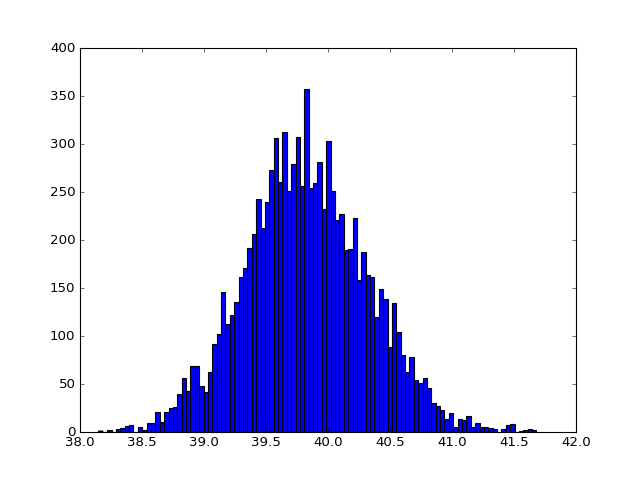

In [156]:
print quant,accept_rate

%matplotlib notebook
plt.hist(post,bins=100)
plt.show()

Now we get:<br>
[ 38.98076876  39.8173606   40.64784377]<br>
Compare to:<br>
5%, 50%, 95%: [ 38.8075407 39.8203807716  40.83322085]<br>
from the Gaussian estimation.  Much closer, and the shape better resembles the posterior distribution of the fractional error plot above.  Which is what I would expect because we are now sampling from the exact same distribution.  I trust this a lot more.  Although I checked the log math carefully and am not sure why the first iteration didn't work as expected.

In [160]:
print np.shape(gdist)


(1624,)
45


# Merging the new distance with the I2017 table

## Total I2017 objects with well defined Gaia distance solutions: 1624
### 45 have matching Gaia IDs but no parallaxes, 46 do not have a matching Gaia ID

In [161]:
# Table of all I2017 sources with matching Gaia solution:
k

,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,raj20155,dec20155,ep,vmag,sptype,dist,pmra.1,pmde,simbadname,angdist
0,0,1635721458409799680,Gaia DR2 2341871673090078592,2341871673090078592,1481689922,2015.5,0.005093,0.267211,-19.498840,0.178723,...,0.004942,-19.498611,2015.5,9.27,K3V,45.60,0.18,0.00,HIP2,0.000270
1,1,1635721458409799680,Gaia DR2 4706564427272810624,4706564427272810624,592068553,2015.5,0.538886,0.454880,-68.281740,0.452342,...,0.537154,-68.281546,2015.5,9.24,M0V,15.80,0.21,-0.23,HIP169,0.000669
2,2,1635721458409799680,Gaia DR2 2853900872207150720,2853900872207150720,324321780,2015.5,0.546585,0.770322,27.077779,0.709696,...,0.545858,27.078261,2015.5,5.80,G3V,12.40,0.78,-0.92,HIP171,0.000807
3,3,1635721458409799680,Gaia DR2 2746883550048724992,2746883550048724992,873465422,2015.5,0.623350,0.343970,8.485262,0.149161,...,0.623363,8.485062,2015.5,5.70,F0V,37.60,-0.09,-0.05,HIP194,0.000199
4,4,1635721458409799680,Gaia DR2 2848150288954631296,2848150288954631296,716361197,2015.5,1.236466,0.047620,23.269597,0.042992,...,1.236219,23.269401,2015.5,7.82,G9V,25.60,0.38,-0.01,HIP400,0.000300
5,5,1635721458409799680,Gaia DR2 386655019234959872,386655019234959872,665449823,2015.5,1.300748,0.037335,45.785915,0.023836,...,1.299162,45.785743,2015.5,9.95,M2,11.40,0.87,-0.15,HIP428,0.001119
6,6,1635721458409799680,Gaia DR2 4706630501049679744,4706630501049679744,1534910858,2015.5,1.322372,0.028273,-67.835003,0.023457,...,1.323233,-67.834911,2015.5,8.49,K5V,16.00,-0.12,-0.56,HIP436,0.000338
7,7,1635721458409799680,Gaia DR2 2444348733778920832,2444348733778920832,664581359,2015.5,1.333869,0.440821,-5.707235,0.226905,...,1.333707,-5.707113,2015.5,4.61,K1III,39.40,-0.01,0.09,HIP443,0.000203
8,8,1635721458409799680,Gaia DR2 423075173680043904,423075173680043904,1632509498,2015.5,1.567845,0.034364,58.436857,0.030864,...,1.566910,58.436753,2015.5,5.98,G5V,20.20,0.25,0.02,HIP518,0.000501
9,9,1635721458409799680,Gaia DR2 4976894960284258048,4976894960284258048,1148153609,2015.5,1.583677,0.038353,-49.075362,0.040296,...,1.582497,-49.075172,2015.5,5.70,G1IV...,25.60,0.58,-0.04,HIP522,0.000796


 Add columns for new Gaia distances and intervals

In [162]:
# Checking that things are matching up:
index = k.index.tolist()
print hip_id2[87],gdist[87],fwhm_lo[87],fwhm_hi[87],sig[87]
print index[np.where(hip_id==hip_id2[87])[0]]
print k.loc[index[np.where(hip_id==hip_id2[87])[0]],'simbadname']

HIP7078 28.3659391017 28.1167772844 28.6195565513 0.213494380879
91
HIP7078


In [163]:
# Make new columns in dataframe and populate with nan's:
k['gdist'],k['gdist_fwhm_lo'],k['gdist_fwhm_hi'],k['dist_sigma'] = pd.Series('NaN', index=k.index),\
    pd.Series('NaN', index=k.index),pd.Series('NaN', index=k.index),pd.Series('NaN', index=k.index)
k

,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,sptype,dist,pmra.1,pmde,simbadname,angdist,gdist,gdist_fwhm_lo,gdist_fwhm_hi,dist_sigma
0,0,1635721458409799680,Gaia DR2 2341871673090078592,2341871673090078592,1481689922,2015.5,0.005093,0.267211,-19.498840,0.178723,...,K3V,45.60,0.18,0.00,HIP2,0.000270,NaN,NaN,NaN,NaN
1,1,1635721458409799680,Gaia DR2 4706564427272810624,4706564427272810624,592068553,2015.5,0.538886,0.454880,-68.281740,0.452342,...,M0V,15.80,0.21,-0.23,HIP169,0.000669,NaN,NaN,NaN,NaN
2,2,1635721458409799680,Gaia DR2 2853900872207150720,2853900872207150720,324321780,2015.5,0.546585,0.770322,27.077779,0.709696,...,G3V,12.40,0.78,-0.92,HIP171,0.000807,NaN,NaN,NaN,NaN
3,3,1635721458409799680,Gaia DR2 2746883550048724992,2746883550048724992,873465422,2015.5,0.623350,0.343970,8.485262,0.149161,...,F0V,37.60,-0.09,-0.05,HIP194,0.000199,NaN,NaN,NaN,NaN
4,4,1635721458409799680,Gaia DR2 2848150288954631296,2848150288954631296,716361197,2015.5,1.236466,0.047620,23.269597,0.042992,...,G9V,25.60,0.38,-0.01,HIP400,0.000300,NaN,NaN,NaN,NaN
5,5,1635721458409799680,Gaia DR2 386655019234959872,386655019234959872,665449823,2015.5,1.300748,0.037335,45.785915,0.023836,...,M2,11.40,0.87,-0.15,HIP428,0.001119,NaN,NaN,NaN,NaN
6,6,1635721458409799680,Gaia DR2 4706630501049679744,4706630501049679744,1534910858,2015.5,1.322372,0.028273,-67.835003,0.023457,...,K5V,16.00,-0.12,-0.56,HIP436,0.000338,NaN,NaN,NaN,NaN
7,7,1635721458409799680,Gaia DR2 2444348733778920832,2444348733778920832,664581359,2015.5,1.333869,0.440821,-5.707235,0.226905,...,K1III,39.40,-0.01,0.09,HIP443,0.000203,NaN,NaN,NaN,NaN
8,8,1635721458409799680,Gaia DR2 423075173680043904,423075173680043904,1632509498,2015.5,1.567845,0.034364,58.436857,0.030864,...,G5V,20.20,0.25,0.02,HIP518,0.000501,NaN,NaN,NaN,NaN
9,9,1635721458409799680,Gaia DR2 4976894960284258048,4976894960284258048,1148153609,2015.5,1.583677,0.038353,-49.075362,0.040296,...,G1IV...,25.60,0.58,-0.04,HIP522,0.000796,NaN,NaN,NaN,NaN


In [164]:
print hip_id2[54]

print np.where(hip_id==hip_id2[52])[0][0]

HIP4436
56


In [165]:
# Populate the dataframe with the new measurements:
for i in range(len(hip_id2)):
    k.loc[index[np.where(hip_id==hip_id2[i])[0][0]],'gdist']=gdist[i]
    k.loc[index[np.where(hip_id==hip_id2[i])[0][0]],'gdist_fwhm_lo']=fwhm_lo[i]
    k.loc[index[np.where(hip_id==hip_id2[i])[0][0]],'gdist_fwhm_hi']=fwhm_hi[i]
    k.loc[index[np.where(hip_id==hip_id2[i])[0][0]],'dist_sigma']=sig[i]


In [166]:
k

,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,sptype,dist,pmra.1,pmde,simbadname,angdist,gdist,gdist_fwhm_lo,gdist_fwhm_hi,dist_sigma
0,0,1635721458409799680,Gaia DR2 2341871673090078592,2341871673090078592,1481689922,2015.5,0.005093,0.267211,-19.498840,0.178723,...,K3V,45.60,0.18,0.00,HIP2,0.000270,39.8204,39.233,40.4256,0.50642
1,1,1635721458409799680,Gaia DR2 4706564427272810624,4706564427272810624,592068553,2015.5,0.538886,0.454880,-68.281740,0.452342,...,M0V,15.80,0.21,-0.23,HIP169,0.000669,15.1974,15.0639,15.3332,0.114372
2,2,1635721458409799680,Gaia DR2 2853900872207150720,2853900872207150720,324321780,2015.5,0.546585,0.770322,27.077779,0.709696,...,G3V,12.40,0.78,-0.92,HIP171,0.000807,12.6484,12.5434,12.7551,0.0899304
3,3,1635721458409799680,Gaia DR2 2746883550048724992,2746883550048724992,873465422,2015.5,0.623350,0.343970,8.485262,0.149161,...,F0V,37.60,-0.09,-0.05,HIP194,0.000199,37.3496,36.7215,37.9996,0.542699
4,4,1635721458409799680,Gaia DR2 2848150288954631296,2848150288954631296,716361197,2015.5,1.236466,0.047620,23.269597,0.042992,...,G9V,25.60,0.38,-0.01,HIP400,0.000300,26.3682,26.3194,26.4172,0.0414932
5,5,1635721458409799680,Gaia DR2 386655019234959872,386655019234959872,665449823,2015.5,1.300748,0.037335,45.785915,0.023836,...,M2,11.40,0.87,-0.15,HIP428,0.001119,11.5,11.4936,11.5063,0.00537989
6,6,1635721458409799680,Gaia DR2 4706630501049679744,4706630501049679744,1534910858,2015.5,1.322372,0.028273,-67.835003,0.023457,...,K5V,16.00,-0.12,-0.56,HIP436,0.000338,16.385,16.3748,16.3953,0.0087162
7,7,1635721458409799680,Gaia DR2 2444348733778920832,2444348733778920832,664581359,2015.5,1.333869,0.440821,-5.707235,0.226905,...,K1III,39.40,-0.01,0.09,HIP443,0.000203,NaN,NaN,NaN,NaN
8,8,1635721458409799680,Gaia DR2 423075173680043904,423075173680043904,1632509498,2015.5,1.567845,0.034364,58.436857,0.030864,...,G5V,20.20,0.25,0.02,HIP518,0.000501,20.9203,20.8977,20.9429,0.0191736
9,9,1635721458409799680,Gaia DR2 4976894960284258048,4976894960284258048,1148153609,2015.5,1.583677,0.038353,-49.075362,0.040296,...,G1IV...,25.60,0.58,-0.04,HIP522,0.000796,26.2052,26.153,26.2577,0.0444943


In [167]:
# Check that it was added correctly:
print hip_id2[87],gdist[87],fwhm_lo[87],fwhm_hi[87],sig[87]
print index[np.where(hip_id==hip_id2[87])[0]]
print k.loc[index[np.where(hip_id=='GJ551')[0]]]

HIP7078 28.3659391017 28.1167772844 28.6195565513 0.213494380879
91
Unnamed: 0                                                                   1646
solution_id                                                   1635721458409799680
designation                                          Gaia DR2 5853498713160606720
source_id                                                     5853498713160606720
random_index                                                            521085047
ref_epoch                                                                  2015.5
ra                                                                        217.393
ra_error                                                                0.0576531
dec                                                                      -62.6762
dec_error                                                                0.104971
parallax                                                                    768.5
parallax_error                

In [168]:
# Write it out!
k.to_csv('I2017_gaia_distances.csv')

These stars have a matching Gaia source id but no Gaia parallax.  They're distance info is marked with Nan in the above dataframe

In [169]:
print 'These have a Gaia source but do not have Gaia parallaxes:'
print hip_id[np.where(np.isnan(gparallax))[0]]
hip_id3 = hip_id[np.where(np.isnan(gparallax))[0]]

These have a Gaia source but do not have Gaia parallaxes:
['HIP443' 'HIP1242' 'HIP2081' 'HIP2762' 'HIP8903' 'HIP11452' 'HIP12351'
 'HIP14576' 'HIP16134' 'HIP16852' 'HIP23875' 'HIP35296' 'GJ273' 'HIP36349'
 'HIP42913' 'HIP46706' 'HIP48659' 'HIP49973' 'HIP51986' 'HIP52190'
 'HIP54182' 'HIP54872' 'HIP65378' 'HIP67301' 'GJ559B' 'GJ559A' 'HIP72622'
 'HIP77516' 'HIP81919' 'HIP82817' 'HIP84123' 'HIP88601' 'GJ702A' 'GJ702B'
 'HIP95501' 'HIP98204' 'HIP101955' 'HIP108752' 'HIP109268' 'HIP109821'
 'HIP113963' 'HIP89937' 'GJ412A' 'HIP59750' 'GJ866']


Now add ain the stars from I2017 with no corresponding Gaia source id

In [170]:
m = pd.read_csv('Isaacson2017_ref20155.csv')
Star = m['SimbadName'].values
hip_id = k['simbadname'].values
no_gaiasource=np.array([])
for item in Star:
    count = np.count_nonzero(hip_id == item)
    if count==0:
        no_gaiasource = np.append(no_gaiasource,item)
    else:
        pass

print 'These have no corresponding Gaia source:',no_gaiasource.shape
print no_gaiasource

These have no corresponding Gaia source: (46,)
['HIP677' 'HIP2941' 'HIP3419' 'HIP5336' 'HIP9884' 'HIP13772' 'GJ166B'
 'HIP21421' 'GJ244A' 'HIP36850' 'GJ280' 'HIP37826' 'HIP38382' 'HIP45617'
 'HIP49669' 'HIP50583' 'GJ406' 'GJ411' 'HIP54061' 'GJ412B' 'HIP57632'
 'HIP61084' 'GJ473' 'HIP62956' 'HIP64241' 'HIP68933' 'HIP69673' 'HIP71914'
 'HIP72607' 'HIP75312' 'HIP76267' 'HIP78662' 'HIP84012' 'HIP84709'
 'HIP85582' 'HIP86032' 'HIP91262' 'HIP93506' 'HIP97649' 'GJ768' 'HIP105199'
 'HIP107522' 'HIP107711' 'HIP111766' 'HIP112915' 'HIP113368']


In [171]:
# Make the column names for m match k for concatinating
m=m.rename(index=str, columns={"Star": "star", "RAJ20155": "raj20155","Dec20155": "dec20155","Ep":"ep","Vmag":"vmag",\
                            "SpType":"sptype","Dist":"dist","pmRA":"pmra.1","pmDE":"pmde","SimbadName":"simbadname"})
#m

In [172]:
print np.where(m['simbadname']==no_gaiasource[0])[0][0]
print m.iloc[index[np.where(m['simbadname']==no_gaiasource[0])[0][0]]]


14
star           HIP677
raj20155      2.09803
dec20155      29.0892
ep             2015.5
vmag             2.07
sptype        B9p    
dist             29.7
pmra.1           0.14
pmde            -0.16
simbadname     HIP677
Name: 14, dtype: object


In [183]:
name = ['HIP9884','GJ166B','HIP13772','HIP21421','GJ244A']
print np.where((no_gaiasource==name))

(array([9]),)


In [174]:
# Make a new dataframe of the I2017 targets without Gaia ids:
col_names =  ["star", "raj20155","dec20155","ep","vmag",\
                            "sptype","dist","pmra.1","pmde","simbadname"]
newm = pd.DataFrame(columns=col_names)
for i in range(46):
    newm = newm.append(m.iloc[index[np.where(m['simbadname']==no_gaiasource[i])[0][0]]], ignore_index = True)
print len(no_gaiasource)
print no_gaiasource
# Something wierd happened with appending the last 5 rows, here's a janky workaround.
#newm = newm.append(m.iloc[1625], ignore_index = True)
#newm = newm.append(m.iloc[1631], ignore_index = True)
#newm = newm.append(m.iloc[1642], ignore_index = True)
#newm = newm.append(m.iloc[1666], ignore_index = True)
#newm = newm.append(m.iloc[1686], ignore_index = True)
newm

46
['HIP677' 'HIP2941' 'HIP3419' 'HIP5336' 'HIP9884' 'HIP13772' 'GJ166B'
 'HIP21421' 'GJ244A' 'HIP36850' 'GJ280' 'HIP37826' 'HIP38382' 'HIP45617'
 'HIP49669' 'HIP50583' 'GJ406' 'GJ411' 'HIP54061' 'GJ412B' 'HIP57632'
 'HIP61084' 'GJ473' 'HIP62956' 'HIP64241' 'HIP68933' 'HIP69673' 'HIP71914'
 'HIP72607' 'HIP75312' 'HIP76267' 'HIP78662' 'HIP84012' 'HIP84709'
 'HIP85582' 'HIP86032' 'HIP91262' 'HIP93506' 'HIP97649' 'GJ768' 'HIP105199'
 'HIP107522' 'HIP107711' 'HIP111766' 'HIP112915' 'HIP113368']


,star,raj20155,dec20155,ep,vmag,sptype,dist,pmra.1,pmde,simbadname
0,HIP677,2.098026,29.089200,2015.5,2.07,B9p,29.70,0.14,-0.16,HIP677
1,HIP2941,9.345815,-24.767357,2015.5,5.57,K1V+...,15.50,1.42,-0.02,HIP2941
2,HIP3419,10.899049,-17.986187,2015.5,2.04,K0III,29.30,0.23,0.03,HIP3419
3,HIP5336,17.091371,54.909500,2015.5,5.17,G5Vp,7.55,3.42,-1.60,HIP5336
4,HIP9884,31.794613,23.461212,2015.5,2.01,K2III,20.20,0.19,-0.15,HIP9884
5,HIP13772,44.311452,-24.969714,2015.5,7.33,K1/K2V,22.40,0.03,-0.04,HIP13772
6,GJ166BC,63.825732,-7.677617,2015.5,9.52,M5V,4.98,-2.18,-3.44,GJ166B
7,HIP21421,68.980404,16.507887,2015.5,0.87,K5III,19.90,0.06,-0.19,HIP21421
8,GJ244,101.283378,-16.724329,2015.5,-1.40,A1V,2.63,-0.55,-1.22,GJ244A
9,HIP36850,113.648169,31.887045,2015.5,1.58,A2Vm,15.80,-0.21,-0.15,HIP36850


In [69]:
cols = list(k.columns.values)
#print cols

In [199]:
p = k.append(newm,ignore_index = True,sort=False)
p

,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,sptype,dist,pmra.1,pmde,simbadname,angdist,gdist,gdist_fwhm_lo,gdist_fwhm_hi,dist_sigma
0,0.0,1.635721e+18,Gaia DR2 2341871673090078592,2.341872e+18,1.481690e+09,2015.5,0.005093,0.267211,-19.498840,0.178723,...,K3V,45.60,0.18,0.00,HIP2,0.000270,39.8204,39.233,40.4256,0.50642
1,1.0,1.635721e+18,Gaia DR2 4706564427272810624,4.706564e+18,5.920686e+08,2015.5,0.538886,0.454880,-68.281740,0.452342,...,M0V,15.80,0.21,-0.23,HIP169,0.000669,15.1974,15.0639,15.3332,0.114372
2,2.0,1.635721e+18,Gaia DR2 2853900872207150720,2.853901e+18,3.243218e+08,2015.5,0.546585,0.770322,27.077779,0.709696,...,G3V,12.40,0.78,-0.92,HIP171,0.000807,12.6484,12.5434,12.7551,0.0899304
3,3.0,1.635721e+18,Gaia DR2 2746883550048724992,2.746884e+18,8.734654e+08,2015.5,0.623350,0.343970,8.485262,0.149161,...,F0V,37.60,-0.09,-0.05,HIP194,0.000199,37.3496,36.7215,37.9996,0.542699
4,4.0,1.635721e+18,Gaia DR2 2848150288954631296,2.848150e+18,7.163612e+08,2015.5,1.236466,0.047620,23.269597,0.042992,...,G9V,25.60,0.38,-0.01,HIP400,0.000300,26.3682,26.3194,26.4172,0.0414932
5,5.0,1.635721e+18,Gaia DR2 386655019234959872,3.866550e+17,6.654498e+08,2015.5,1.300748,0.037335,45.785915,0.023836,...,M2,11.40,0.87,-0.15,HIP428,0.001119,11.5,11.4936,11.5063,0.00537989
6,6.0,1.635721e+18,Gaia DR2 4706630501049679744,4.706631e+18,1.534911e+09,2015.5,1.322372,0.028273,-67.835003,0.023457,...,K5V,16.00,-0.12,-0.56,HIP436,0.000338,16.385,16.3748,16.3953,0.0087162
7,7.0,1.635721e+18,Gaia DR2 2444348733778920832,2.444349e+18,6.645814e+08,2015.5,1.333869,0.440821,-5.707235,0.226905,...,K1III,39.40,-0.01,0.09,HIP443,0.000203,NaN,NaN,NaN,NaN
8,8.0,1.635721e+18,Gaia DR2 423075173680043904,4.230752e+17,1.632509e+09,2015.5,1.567845,0.034364,58.436857,0.030864,...,G5V,20.20,0.25,0.02,HIP518,0.000501,20.9203,20.8977,20.9429,0.0191736
9,9.0,1.635721e+18,Gaia DR2 4976894960284258048,4.976895e+18,1.148154e+09,2015.5,1.583677,0.038353,-49.075362,0.040296,...,G1IV...,25.60,0.58,-0.04,HIP522,0.000796,26.2052,26.153,26.2577,0.0444943


In [232]:
np.where(p['simbadname']=='GJ699')

(array([1178]),)

In [235]:
# Add a note for interesting targets:
# Most of these don't have Gaia id's because they're too bright

p['note'] = pd.Series('NaN', index=p.index)
p.loc[np.where(p['simbadname']=='GJ244A')[0][0],'note']='Sirius A'
p.loc[np.where(p['simbadname']=='HIP36850')[0][0],'note']='Castor AB'
p.loc[np.where(p['simbadname']=='GJ280')[0][0],'note']='Procyon'
p.loc[np.where(p['simbadname']=='HIP37826')[0][0],'note']='Pollox'
p.loc[np.where(p['simbadname']=='HIP54061')[0][0],'note']='Dubhe'
p.loc[np.where(p['simbadname']=='HIP62956')[0][0],'note']='Alioth'
p.loc[np.where(p['simbadname']=='HIP76267')[0][0],'note']='Alphecca'
p.loc[np.where(p['simbadname']=='HIP84012')[0][0],'note']='eta Oph'
p.loc[np.where(p['simbadname']=='HIP86032')[0][0],'note']='alp Oph'
p.loc[np.where(p['simbadname']=='HIP91262')[0][0],'note']='alp Lyr'
p.loc[np.where(p['simbadname']=='HIP93506')[0][0],'note']='zet Sgr'
p.loc[np.where(p['simbadname']=='HIP97649')[0][0],'note']='Altair'
p.loc[np.where(p['simbadname']=='GJ768')[0][0],'note']='Altair'
p.loc[np.where(p['simbadname']=='HIP105199')[0][0],'note']='Alderamin'
p.loc[np.where(p['simbadname']=='HIP113368')[0][0],'note']='Fomalhaut'
p.loc[np.where(p['simbadname']=='GJ551')[0][0],'note']='Proxima Centauri'
p.loc[np.where(p['simbadname']=='GJ406')[0][0],'note']='Wolf 359'
p.loc[np.where(p['simbadname']=='GJ699')[0][0],'note']='Barnards star'
p.loc[np.where(p['simbadname']=='GJ411')[0][0],'note']='Lalande 21185'
p.loc[np.where(p['source_id']==4075141768785646848)[0][0],'note']='Ross 154'
p.loc[np.where(p['simbadname']=='GJ905')[0][0],'note']='Ross 248'
p.loc[np.where(p['simbadname']=='GJ144')[0][0],'note']='Epsilon Eridani'
#p.loc[np.where(p['simbadname']=='GJ244A')[0][0]]
#p
p

,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,dist,pmra.1,pmde,simbadname,angdist,gdist,gdist_fwhm_lo,gdist_fwhm_hi,dist_sigma,note
0,0.0,1.635721e+18,Gaia DR2 2341871673090078592,2.341872e+18,1.481690e+09,2015.5,0.005093,0.267211,-19.498840,0.178723,...,45.60,0.18,0.00,HIP2,0.000270,39.8204,39.233,40.4256,0.50642,NaN
1,1.0,1.635721e+18,Gaia DR2 4706564427272810624,4.706564e+18,5.920686e+08,2015.5,0.538886,0.454880,-68.281740,0.452342,...,15.80,0.21,-0.23,HIP169,0.000669,15.1974,15.0639,15.3332,0.114372,NaN
2,2.0,1.635721e+18,Gaia DR2 2853900872207150720,2.853901e+18,3.243218e+08,2015.5,0.546585,0.770322,27.077779,0.709696,...,12.40,0.78,-0.92,HIP171,0.000807,12.6484,12.5434,12.7551,0.0899304,NaN
3,3.0,1.635721e+18,Gaia DR2 2746883550048724992,2.746884e+18,8.734654e+08,2015.5,0.623350,0.343970,8.485262,0.149161,...,37.60,-0.09,-0.05,HIP194,0.000199,37.3496,36.7215,37.9996,0.542699,NaN
4,4.0,1.635721e+18,Gaia DR2 2848150288954631296,2.848150e+18,7.163612e+08,2015.5,1.236466,0.047620,23.269597,0.042992,...,25.60,0.38,-0.01,HIP400,0.000300,26.3682,26.3194,26.4172,0.0414932,NaN
5,5.0,1.635721e+18,Gaia DR2 386655019234959872,3.866550e+17,6.654498e+08,2015.5,1.300748,0.037335,45.785915,0.023836,...,11.40,0.87,-0.15,HIP428,0.001119,11.5,11.4936,11.5063,0.00537989,NaN
6,6.0,1.635721e+18,Gaia DR2 4706630501049679744,4.706631e+18,1.534911e+09,2015.5,1.322372,0.028273,-67.835003,0.023457,...,16.00,-0.12,-0.56,HIP436,0.000338,16.385,16.3748,16.3953,0.0087162,NaN
7,7.0,1.635721e+18,Gaia DR2 2444348733778920832,2.444349e+18,6.645814e+08,2015.5,1.333869,0.440821,-5.707235,0.226905,...,39.40,-0.01,0.09,HIP443,0.000203,NaN,NaN,NaN,NaN,NaN
8,8.0,1.635721e+18,Gaia DR2 423075173680043904,4.230752e+17,1.632509e+09,2015.5,1.567845,0.034364,58.436857,0.030864,...,20.20,0.25,0.02,HIP518,0.000501,20.9203,20.8977,20.9429,0.0191736,NaN
9,9.0,1.635721e+18,Gaia DR2 4976894960284258048,4.976895e+18,1.148154e+09,2015.5,1.583677,0.038353,-49.075362,0.040296,...,25.60,0.58,-0.04,HIP522,0.000796,26.2052,26.153,26.2577,0.0444943,NaN


# That's it!
A complete list of every star in the Issacson 2017 target list and their corresponding Gaia distance measurement (or lack there of)

In [71]:
# Write it out!
p.to_csv('I2017_gaia_final.csv')

# Are there stars in Gaia DR2 within 5 parsecs that were missed in I 2017?

In [114]:
print p.loc[np.where(p['simbadname']=='GJ551')[0]]

      solution_id designation  source_id  random_index  ref_epoch  ra  \
1673          NaN         NaN        NaN           NaN        NaN NaN   

      ra_error  dec  dec_error  parallax     ...       sptype  dist  pmra.1  \
1673       NaN  NaN        NaN       NaN     ...      M5.0V     1.3   -3.78   

      pmde  simbadname  angdist  gdist  gdist_fwhm_lo  gdist_fwhm_hi  \
1673  0.77       GJ551      NaN    NaN            NaN            NaN   

      dist_sigma  
1673         NaN  

[1 rows x 112 columns]


In [121]:
# I2017 stars less than 5 pc:
print np.where(m['dist']<=5.0)[0].shape
print np.where(p['dist']<=5.0)[0].shape
print p['simbadname'].values[np.where(p['dist']<=5.0)[0]]
# Note - The I2017 text states there are 60 stars, but the original catalog only has 55.


(55,)
(55,)
['GJ54.1' 'GJ65A' 'GJ71' 'GJ83.1' 'NAME SO J025300.5+165258' 'GJ144'
 'GJ1061' 'LP944-020' 'GJ166A' 'GJ234' 'GJ273' 'GJ1111' 'GJ388' 'LHS288'
 'LHS292' 'GJ447' 'GJ559B' 'GJ559A' 'GJ628' 'GJ674' 'GJ687' 'GJ699' 'GJ729'
 'GJ1245B' 'GJ832' 'GJ876' 'GJ15A' 'GJ380' 'DENIS-P J1048.0-3956' 'GJ725B'
 'GJ860A' 'GJ1' 'GJ1002' 'GJ15B' 'GJ166B' 'GJ191' 'GJ244A' 'GJ280' 'GJ406'
 'GJ411' 'GJ412A' 'GJ412B' 'GJ473' 'GJ551' 'GJ725A' 'SCR J1845-6357'
 'GJ1245A' 'GJ820A' 'GJ820B' 'GJ825' 'GJ845A' 'GJ860B' 'GJ866' 'GJ887'
 'GJ905']
      solution_id designation  source_id  random_index  ref_epoch  ra  \
1673          NaN         NaN        NaN           NaN        NaN NaN   

      ra_error  dec  dec_error  parallax     ...       sptype  dist  pmra.1  \
1673       NaN  NaN        NaN       NaN     ...      M5.0V     1.3   -3.78   

      pmde  simbadname  angdist  gdist  gdist_fwhm_lo  gdist_fwhm_hi  \
1673  0.77       GJ551      NaN    NaN            NaN            NaN   

      dist_sigma  


In [75]:
print "5 pc = ",1./5,' arcsec parallax = ', (1./5)*1000,' mas'

5 pc =  0.2  arcsec parallax =  200.0  mas


In [90]:
j = Gaia.launch_job_async(query="SELECT * FROM gaiadr2.gaia_source WHERE parallax > 200 ORDER BY parallax DESC",\
                          dump_to_file=True, output_format='csv')


In [92]:
q = pd.read_csv('async_20180621125806.csv')
q

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url
0,1635721458409799680,Gaia DR2 4062964299525805952,4062964299525805952,1665144735,2015.5,272.237829,1.276152,-27.645916,0.830618,1851.882140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
1,1635721458409799680,Gaia DR2 4065202424204492928,4065202424204492928,1202272748,2015.5,274.906872,1.251748,-25.255882,1.571499,1847.433349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
2,1635721458409799680,Gaia DR2 4051942623265668864,4051942623265668864,1406107636,2015.5,276.223193,0.682959,-27.140479,0.500750,1686.265958,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
3,1635721458409799680,Gaia DR2 4048978992784308992,4048978992784308992,1399546349,2015.5,273.112421,1.092637,-31.184670,1.362824,1634.283354,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
4,1635721458409799680,Gaia DR2 4059168373166457472,4059168373166457472,868698865,2015.5,259.297177,1.640748,-30.486547,2.069445,1513.989051,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
5,1635721458409799680,Gaia DR2 4043211293994009216,4043211293994009216,971614906,2015.5,268.177064,1.633761,-33.250235,1.594759,1446.766177,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
6,1635721458409799680,Gaia DR2 4065501285215613440,4065501285215613440,1331478248,2015.5,274.402786,1.142732,-24.163575,0.917864,1392.687900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
7,1635721458409799680,Gaia DR2 4046453826887613696,4046453826887613696,521366976,2015.5,275.502869,1.591328,-30.564939,1.000713,1377.743347,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
8,1635721458409799680,Gaia DR2 4062469897267372928,4062469897267372928,1041434539,2015.5,270.640622,0.776799,-28.620188,0.799254,1369.275213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
9,1635721458409799680,Gaia DR2 4064581956082565760,4064581956082565760,514278519,2015.5,272.705393,1.003286,-26.581083,1.124262,1328.837789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN


In [98]:
print 1./(1851.882/1000)
a = ((1./(1851.882/1000))*u.pc).to(u.lyr)
print a

0.539991208943
1.76121576706 lyr


In [117]:
print np.where(np.invert(np.isnan(q['teff_val'].values)))
a = ((1./(547./1000.))*u.pc).to(u.lyr)
print a
print q.loc[60]


(array([ 60, 141, 325, 337, 342, 347, 396, 429, 435, 454, 469, 490, 491,
       497, 498, 506, 508, 515, 520, 529, 536, 540, 558, 580, 590, 599,
       600, 602, 606, 618, 620, 656, 658, 661, 683, 698, 699, 700, 711,
       713, 721, 726, 756, 758, 761, 770, 783, 784]),)
5.96263944633 lyr
solution_id                                                   1635721458409799680
designation                                          Gaia DR2 5853498713160606720
source_id                                                     5853498713160606720
random_index                                                            521085047
ref_epoch                                                                  2015.5
ra                                                                        217.393
ra_error                                                                0.0576531
dec                                                                      -62.6762
dec_error                                             